## 左右脸补全

In [1]:
from sklearn.datasets import  load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import  KNeighborsClassifier
from pandas import DataFrame,Series

In [3]:
from sklearn.datasets import  fetch_olivetti_faces

In [4]:
face = fetch_olivetti_faces()

In [5]:
data = face.images
target = face.target

In [6]:
data.shape

(400, 64, 64)

In [7]:
# 生成左半部分脸
face_left = data[:,:,:32]
face_right = data[:,:,32:]

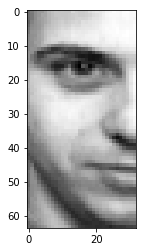

In [8]:
plt.imshow(face_left[88],cmap='gray')

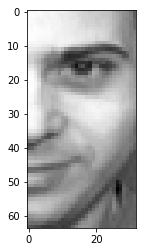

In [9]:
plt.imshow(face_right[88],cmap='gray')

In [10]:
face_left.reshape(400,-1).shape

(400, 2048)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(face_left.reshape(400,-1),face_right.reshape(400,-1),test_size = 0.02)

In [12]:
from sklearn.linear_model import  Ridge,LinearRegression
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.ensemble import  ExtraTreesRegressor

In [13]:
estimator = {
    'Ridge':Ridge(),
    'Linear':LinearRegression(),
    'KNN':KNeighborsRegressor(),
    'Tree':ExtraTreesRegressor()
}

In [14]:
face_pred = dict()
for key,estimator in estimator.items():
    estimator.fit(x_train,y_train)
    y_ = estimator.predict(x_test)
    face_pred[key] = y_

In [15]:
face_pred

{'Ridge': array([[0.79802614, 0.7911749 , 0.7885206 , ..., 0.17471991, 0.13080847,
         0.17579049],
        [0.54713273, 0.5450603 , 0.55213463, ..., 0.551883  , 0.41330832,
         0.3385082 ],
        [0.78629583, 0.7675359 , 0.7616866 , ..., 0.21508704, 0.28932834,
         0.29696319],
        ...,
        [0.7816157 , 0.78250813, 0.7752065 , ..., 0.10806522, 0.17574638,
         0.23559484],
        [0.32294068, 0.34492695, 0.35341716, ..., 0.56963336, 0.5072626 ,
         0.46735084],
        [0.78020483, 0.78026843, 0.7839272 , ..., 0.35907352, 0.4443526 ,
         0.458216  ]], dtype=float32),
 'Linear': array([[0.7985383 , 0.7917582 , 0.79207087, ..., 0.07947311, 0.05641124,
         0.09533361],
        [0.5452531 , 0.54324055, 0.55953467, ..., 0.6613349 , 0.47586304,
         0.3840803 ],
        [0.78927785, 0.7644425 , 0.7541104 , ..., 0.15534538, 0.2657244 ,
         0.31231862],
        ...,
        [0.77377343, 0.7753123 , 0.7671273 , ..., 0.08454002, 0.20222686,


In [16]:
for j,key in enumerate(face_pred):
    print(j,key)

0 Ridge
1 Linear
2 KNN
3 Tree


In [17]:
face_left.shape

(400, 64, 32)

In [18]:
face_right.shape

(400, 64, 32)

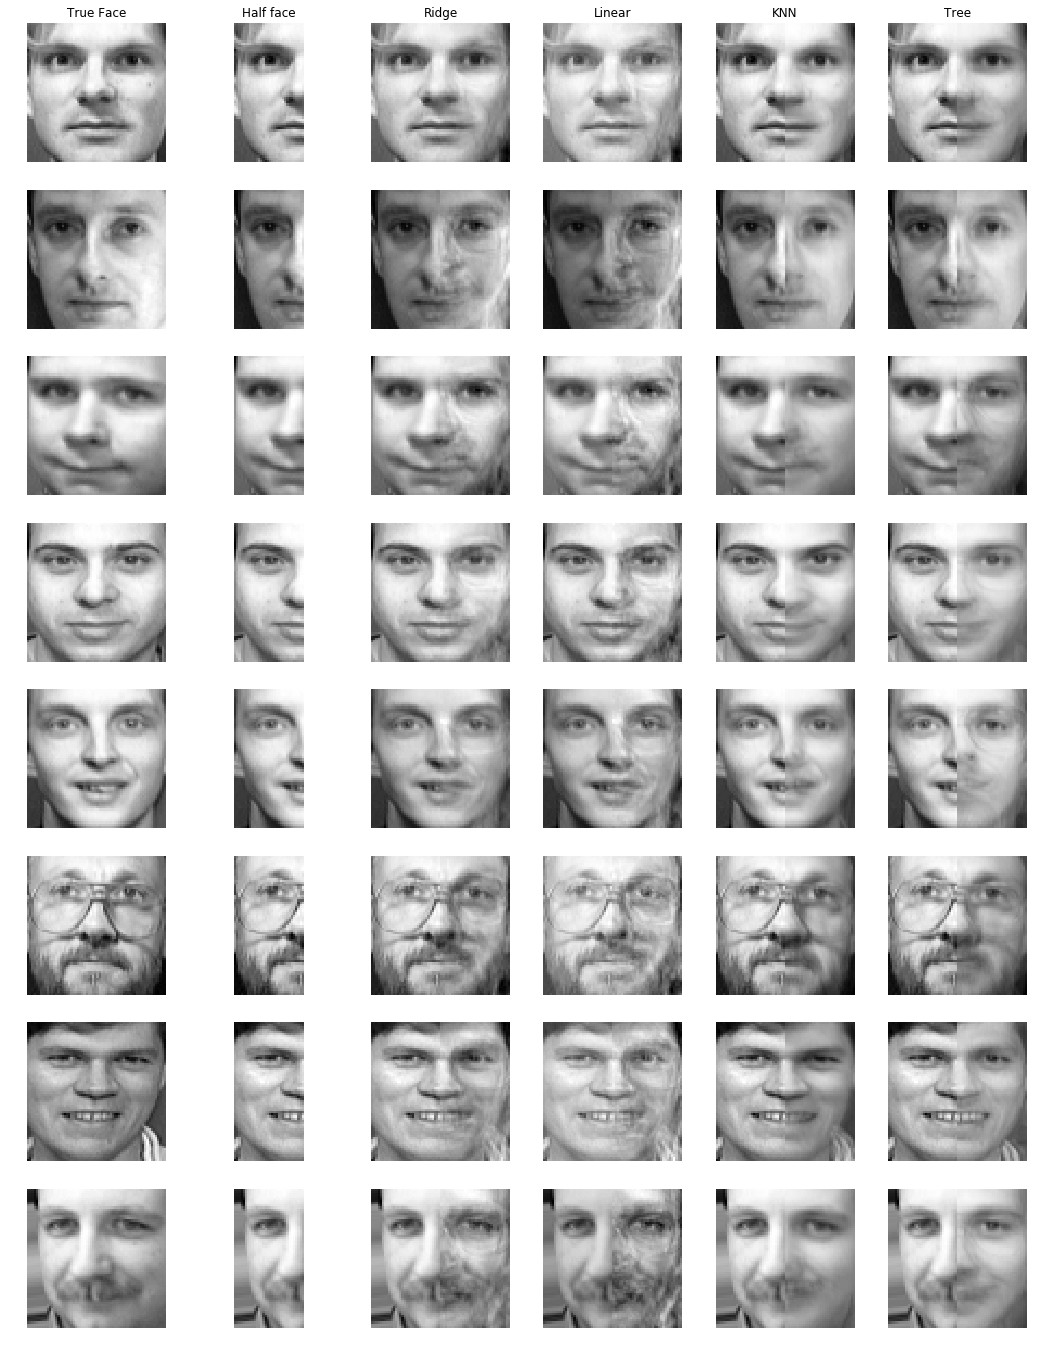

In [19]:
plt.figure(figsize=(6*3,8*3))
for i in range(8):
    axes1 = plt.subplot(8,6,i*6+1)
    face_left = x_test[i].reshape((64,32))
    face_right = y_test[i].reshape((64,32))
    face_all = np.concatenate([face_left,face_right],axis=1)
    axes1.imshow(face_all.reshape((64,64)),cmap='gray')
    plt.axis('off')
    if i ==0:
        axes1.set_title('True Face')

    axes2 = plt.subplot(8,6,i*6+2)
    axes2.imshow(face_left,cmap='gray')
    plt.axis('off')
    if i ==0:
        axes2.set_title('Half face')
        
    for j,key in enumerate(face_pred):
        axes3 = plt.subplot(8,6,i*6+3+j)
        face_right_pred = face_pred[key][i].reshape((64,32))
        face_all = np.concatenate([face_left,face_right_pred],axis=1)
        axes3.imshow(face_all.reshape((64,64)),cmap='gray')
        plt.axis('off')
        if i == 0:
            axes3.set_title(key)

## 【第1题】预测年收入是否大于50K美元

### 读取adult.txt文件，并使用逻辑斯底回归算法训练模型，根据种族、职业、工作时长来预测一个人的性别

In [20]:
ad = pd.read_csv('adults.txt')
ad

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [21]:
data = ad[['occupation','race','hours_per_week']]
target = ad['sex']
display(data.shape,target.shape,data,target)

(32561, 3)

(32561,)

,occupation,race,hours_per_week
0,Adm-clerical,White,40
1,Exec-managerial,White,13
2,Handlers-cleaners,White,40
3,Handlers-cleaners,Black,40
4,Prof-specialty,Black,40
5,Exec-managerial,White,40
6,Other-service,Black,16
7,Exec-managerial,White,45
8,Prof-specialty,White,50
9,Exec-managerial,White,40


0          Male
1          Male
2          Male
3          Male
4        Female
5        Female
6        Female
7          Male
8        Female
9          Male
10         Male
11         Male
12       Female
13         Male
14         Male
15         Male
16         Male
17         Male
18         Male
19       Female
20         Male
21       Female
22         Male
23         Male
24       Female
25         Male
26         Male
27         Male
28         Male
29         Male
          ...  
32531    Female
32532      Male
32533      Male
32534    Female
32535      Male
32536    Female
32537      Male
32538    Female
32539      Male
32540    Female
32541    Female
32542      Male
32543    Female
32544    Female
32545    Female
32546    Female
32547      Male
32548      Male
32549    Female
32550      Male
32551      Male
32552      Male
32553      Male
32554      Male
32555      Male
32556    Female
32557      Male
32558    Female
32559      Male
32560    Female
Name: sex, Length: 32561

In [22]:
# 转换成int类型
data.columns

Index(['occupation', 'race', 'hours_per_week'], dtype='object')

In [23]:
cols = ['occupation', 'race', 'hours_per_week']

In [24]:
data.dtypes

occupation        object
race              object
hours_per_week     int64
dtype: object

In [25]:
for col in cols:
    uni = data[col].unique()
    def convert(item):
        index = np.argwhere(uni==item)[0,0]
        return index
    data.loc[:,col] = data[col].map(convert)

d:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
d:\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [26]:
data.head()

,occupation,race,hours_per_week
0,0,0,0
1,1,0,1
2,2,0,0
3,2,1,0
4,3,1,0


In [27]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size = 0.01)

In [28]:
logic = LogisticRegression()

In [29]:
logic.fit(x_train,y_train).score(x_train,y_train)

0.6702342174654878

In [30]:
y_ = logic.predict(x_test)

In [31]:
logic.score(x_test,y_test)

0.598159509202454

In [32]:
logic.score(data,target)

0.6695126071066614

In [33]:
#准备生成新数据
data['occupation'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [34]:
data['race'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [35]:
data['hours_per_week'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93], dtype=int64)

In [36]:
np.random.randint(0,94,100)

array([76, 93, 51, 84, 88,  9, 59, 21, 64, 16, 84, 45, 44, 73, 38, 34, 91,
       15, 11, 81, 61, 19, 49, 77, 77, 37, 50, 48, 81, 26, 54, 39, 73, 61,
       33,  2, 80, 85, 46, 27, 83,  6, 93, 81, 47, 42, 83, 73, 55, 56, 42,
        8, 23, 59, 14, 71, 50, 22,  7, 12,  1, 35, 16, 40, 17, 57, 33, 64,
       10, 56, 56, 27, 32, 61, 66, 82, 90, 42, 48, 51, 62, 72, 29,  1, 83,
       43, 22, 39, 19, 20, 49, 18, 73, 43, 63,  7, 18, 83, 13, 57])

In [37]:
# 生成数据
data_new = DataFrame({'occupation':np.random.randint(0,15,1000),'race':np.random.randint(0,5,1000),'hours_per_week':np.random.randint(0,94,1000)})
data_new.head()

,occupation,race,hours_per_week
0,11,1,18
1,9,4,93
2,12,3,9
3,14,0,55
4,6,2,22


In [38]:
target_new = DataFrame({'sex':np.random.randint(0,2,1000)})['sex']
target_new

0      1
1      0
2      0
3      0
4      1
5      0
6      1
7      1
8      1
9      0
10     1
11     0
12     0
13     0
14     1
15     0
16     1
17     0
18     0
19     1
20     1
21     1
22     0
23     1
24     1
25     0
26     1
27     0
28     1
29     0
      ..
970    1
971    1
972    1
973    0
974    1
975    1
976    0
977    1
978    1
979    1
980    1
981    1
982    0
983    0
984    1
985    1
986    0
987    1
988    0
989    1
990    1
991    1
992    0
993    1
994    1
995    1
996    0
997    0
998    1
999    0
Name: sex, Length: 1000, dtype: int32

In [39]:
x_train,x_test,y_train,y_test = train_test_split(data_new,target_new,test_size = 0.1)

In [40]:
logic.fit(x_train,y_train).score(x_train,y_train)

0.5277777777777778

In [41]:
y_ = logic.predict(x_test)

In [42]:
pd.crosstab(index=y_,columns=y_test,margins=True,rownames=['预测'],colnames=['真实'])

真实,0,1,All
预测,,,
0,31,24,55
1,27,18,45
All,58,42,100


In [43]:
logic.score(x_test,y_test)

0.49

In [44]:
logic.score(data_new,target_new)

0.524

## 【第2题】从疝气病症预测病马的死亡率

In [7]:
test = pd.read_csv('horseColicTest.txt',sep='\t', header=None)

In [6]:
train = pd.read_csv('horseColicTraining.txt',sep='\t', header=None)

In [8]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2,1,38.5,54,20,0,1,2,2,3,...,2,2,5.9,0,2,42.0,6.3,0,0.0,1
1,2,1,37.6,48,36,0,0,1,1,0,...,0,0,0.0,0,0,44.0,6.3,1,5.0,1
2,1,1,37.7,44,28,0,4,3,2,5,...,1,1,0.0,3,5,45.0,70.0,3,2.0,1
3,1,1,37.0,56,24,3,1,4,2,4,...,1,1,0.0,0,0,35.0,61.0,3,2.0,0
4,2,1,38.0,42,12,3,0,3,1,1,...,0,0,0.0,0,2,37.0,5.8,0,0.0,1


In [47]:
test[['1.3']]

,1.3
0,1
1,1
2,0
3,1
4,1
5,1
6,1
7,1
8,0
9,1


In [48]:
x_test = test.drop(columns='1.3')
y_test = test['1.3']

In [49]:
x_train = train.drop(columns='0.000000.6')
y_train = train['0.000000.6']

In [50]:
from sklearn.linear_model import Lasso,Ridge,LinearRegression

In [51]:
linear = LinearRegression()
linear.fit(x_train,y_train).score(x_train,y_train)

0.2757154462754151

In [52]:
ridge = Ridge()
ridge.fit(x_train,y_train).score(x_train,y_train)

0.2757098461590456

In [53]:
lasso = Lasso()
lasso.fit(x_train,y_train).score(x_train,y_train)

0.1014676584704991

In [54]:
logic = LogisticRegression()
logic.fit(x_train,y_train).score(x_train,y_train)

0.7281879194630873

In [55]:
y_linear = linear.predict(x_test)
y_ridge = ridge.predict(x_test)
y_lasso = lasso.predict(x_test)
y_logic = logic.predict(x_test)

In [56]:
display(linear.score(x_test,y_test),
        ridge.score(x_test,y_test),
        lasso.score(x_test,y_test),
        logic.score(x_test,y_test))

0.07673148872347235

0.07782082631713427

0.048358263039630645

0.7272727272727273

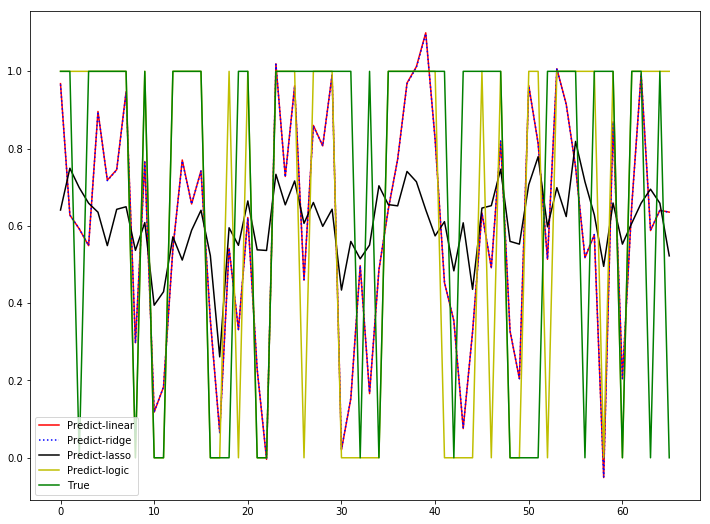

In [57]:
# 线性回归岭回归得分太接近,线几乎重合
plt.figure(figsize=(12,9))
plt.plot(y_linear,label='Predict-linear',c='r')
plt.plot(y_ridge,label='Predict-ridge',c='b',ls = ':')
plt.plot(y_lasso,label='Predict-lasso',c='black')
plt.plot(y_logic,label='Predict-logic',c='y')
plt.plot(y_test,label='True',c='g')
plt.legend()

Text(0.5,1,'Predict-logic')

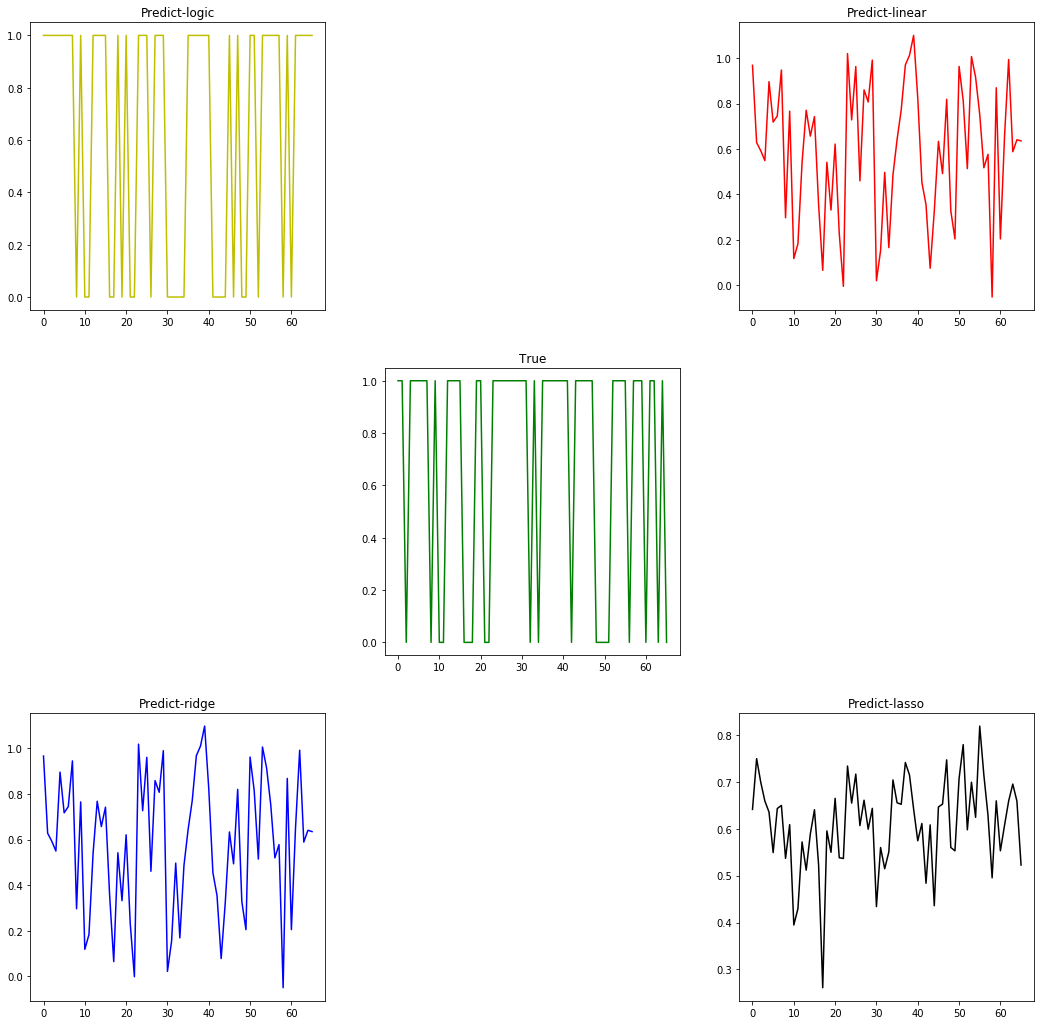

In [58]:
plt.figure(figsize=(3* 6, 3* 6))
axes5 = plt.subplot(331)
axes2 = plt.subplot(333)
axes3 = plt.subplot(337)
axes4 = plt.subplot(339)
axes1 = plt.subplot(335)
axes1.plot(y_test,c='g')
axes2.plot(y_linear,c='r',)
axes3.plot(y_ridge,c='b')
axes4.plot(y_lasso,c='black')
axes5.plot(y_logic,c='y')
axes1.set_title('True')
axes2.set_title('Predict-linear')
axes3.set_title('Predict-ridge')
axes4.set_title('Predict-lasso')
axes5.set_title('Predict-logic')